In [1]:
import nmresearch as nmr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [3]:
vals1=nmr.Experiment(391).load_tpc3d()
kicks=list(range(vals1.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

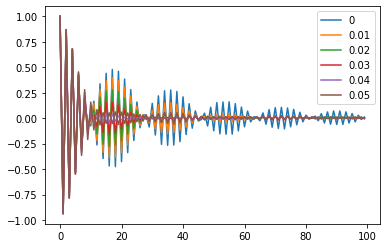

In [4]:
plt.plot(vals1[0:6].transpose(),label=cnst2[0:6])
plt.legend()
plt.show()

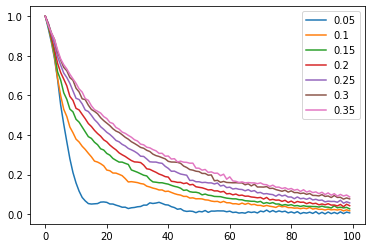

In [5]:
plt.plot(abs(vals1[5:12].transpose()),label=cnst2[5:12])
plt.legend()
plt.show()

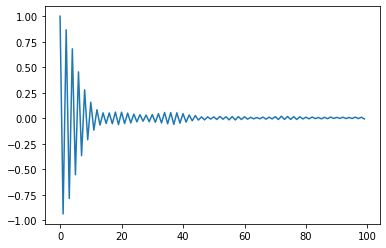

In [6]:
plt.plot(vals1[5])

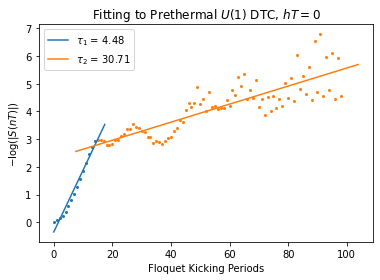

In [7]:
x=kicks
y=-np.log(abs(vals1[5]))
cut = 15

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=0$")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.show()

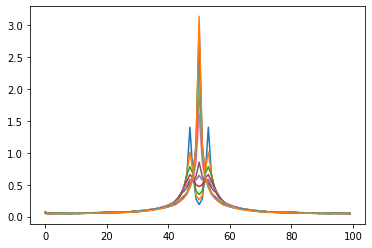

In [8]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals1])
plt.plot(fourier.transpose())
plt.show()

In [9]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


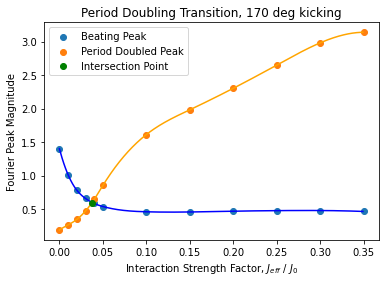

In [10]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170_min=xs[idx]

plt.legend()
plt.show()

In [11]:
vals2=nmr.Experiment(407).load_tpc3d()
kicks=list(range(vals2.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

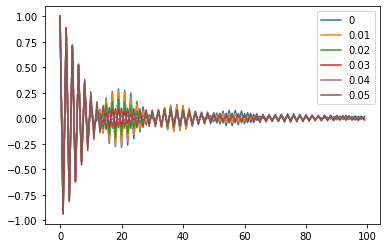

In [12]:
plt.plot(vals2[0:6].transpose(),label=cnst2[0:6])
plt.legend()
plt.show()

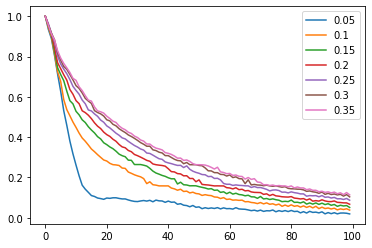

In [13]:
plt.plot(abs(vals2[5:12].transpose()),label=cnst2[5:12])
plt.legend()
plt.show()

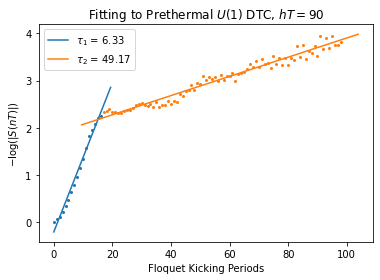

In [14]:
x=kicks
y=-np.log(abs(vals2[5]))
cut = 17

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=90$")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.show()

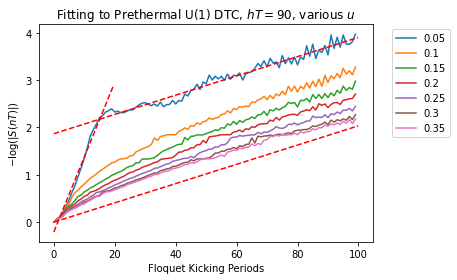

In [15]:
plt.plot(-np.log(abs(vals2[5:12].transpose())),label=cnst2[5:12])
x=np.arange(0,100,.1)
plt.plot(x,x*p2[0],'r--')
plt.plot(x,x*p2[0]+p2[1],'r--')
plt.plot(x1,f1,'r--')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.title(r"Fitting to Prethermal U(1) DTC, $hT=90$, various $u$")
plt.show()

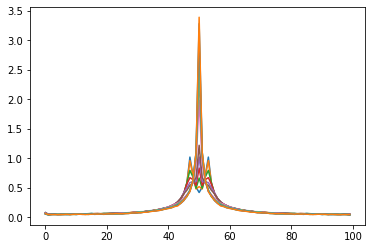

In [16]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals2])
plt.plot(fourier.transpose())
plt.show()

In [17]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


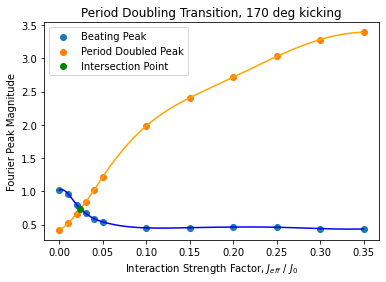

In [18]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170_max=xs[idx]

plt.legend()
plt.show()

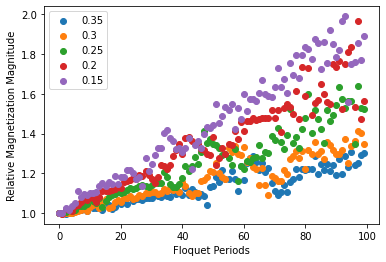

In [19]:
plt.scatter(kicks,vals2[11]/vals1[11],label=cnst2[11])
p = np.polyfit(kicks,vals2[11]/vals1[11], 1)
xp = np.linspace(0, 100, 100)

plt.scatter(kicks,vals2[10]/vals1[10],label=cnst2[10])
plt.scatter(kicks,vals2[9]/vals1[9],label=cnst2[9])
plt.scatter(kicks,vals2[8]/vals1[8],label=cnst2[8])
plt.scatter(kicks,vals2[7]/vals1[7],label=cnst2[7])
plt.legend()
plt.xlabel("Floquet Periods")
plt.ylabel("Relative Magnetization Magnitude")
plt.show()


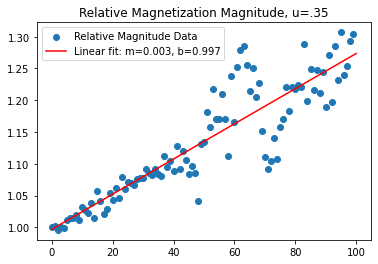

In [20]:
plt.scatter(kicks,vals2[11]/vals1[11],label="Relative Magnitude Data")
p = np.polyfit(kicks,vals2[11]/vals1[11], 1)
xp = np.linspace(0, 100, 100)
plt.plot(xp, xp*p[0]+p[1],"red",label='Linear fit: m=%5.3f, b=%5.3f' % tuple(p) )
plt.legend()
plt.title("Relative Magnetization Magnitude, u=.35")
plt.show()

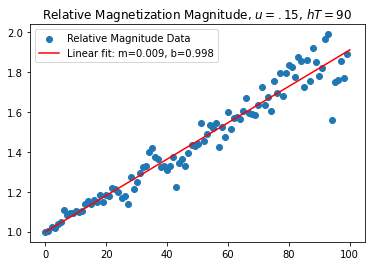

In [21]:
plt.scatter(kicks,vals2[7]/vals1[7],label="Relative Magnitude Data")
p = np.polyfit(kicks,vals2[7]/vals1[7], 1)
xp = np.linspace(0, 100, 100)
plt.plot(xp, xp*p[0]+p[1],"red",label='Linear fit: m=%5.3f, b=%5.3f' % tuple(p) )
plt.legend()
plt.title(r"Relative Magnetization Magnitude, $u=.15$, $hT=90$")
plt.show()

In [22]:
cross170_max[0]-cross170_min[0]

-0.012999999999999998

In [23]:
vals3=nmr.Experiment(408).load_tpc3d()
kicks=list(range(vals1.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

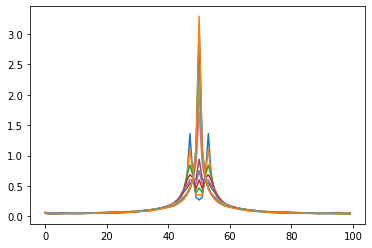

In [24]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals3])
plt.plot(fourier.transpose())
plt.show()

In [25]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


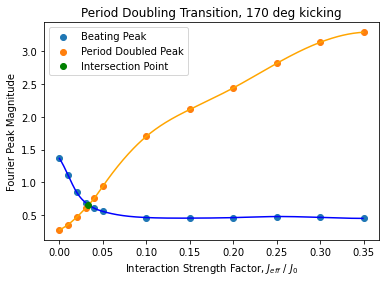

In [26]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170_mid=xs[idx]

plt.legend()
plt.show()

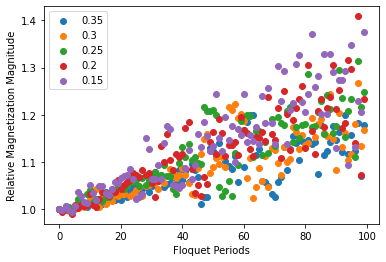

In [27]:
plt.scatter(kicks,vals3[11]/vals1[11],label=cnst2[11])
plt.scatter(kicks,vals3[10]/vals1[10],label=cnst2[10])
plt.scatter(kicks,vals3[9]/vals1[9],label=cnst2[9])
plt.scatter(kicks,vals3[8]/vals1[8],label=cnst2[8])
plt.scatter(kicks,vals3[7]/vals1[7],label=cnst2[7])
plt.legend()
plt.xlabel("Floquet Periods")
plt.ylabel("Relative Magnetization Magnitude")
plt.show()

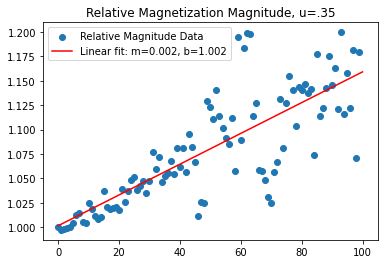

In [28]:
plt.scatter(kicks,vals3[11]/vals1[11],label="Relative Magnitude Data")
p = np.polyfit(kicks,vals3[11]/vals1[11], 1)
xp = np.linspace(0, 100, 100)
plt.plot(xp, xp*p[0]+p[1],"red",label='Linear fit: m=%5.3f, b=%5.3f' % tuple(p) )
plt.legend()
plt.title("Relative Magnetization Magnitude, u=.35")
plt.show()

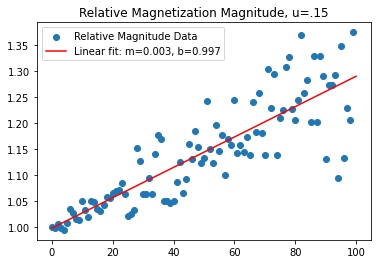

In [29]:
plt.scatter(kicks,vals3[7]/vals1[7],label="Relative Magnitude Data")
p = np.polyfit(kicks,vals3[7]/vals1[7], 1)
xp = np.linspace(0, 100, 100)
plt.plot(xp, xp*p[0]+p[1],"red",label='Linear fit: m=%5.3f, b=%5.3f' % tuple(p) )
plt.legend()
plt.title("Relative Magnetization Magnitude, u=.15")
plt.show()

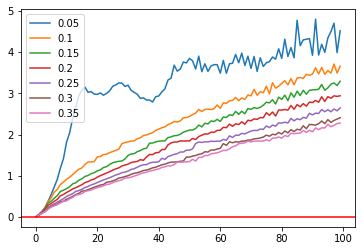

In [30]:
plt.plot(-np.log(abs(vals3[5:12].transpose())),label=cnst2[5:12])
plt.legend()
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

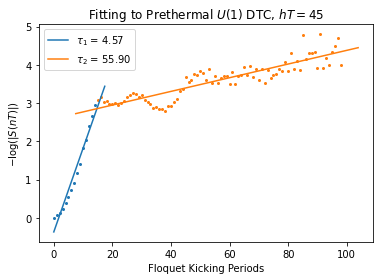

In [31]:
x=kicks
y=-np.log(abs(vals3[5]))
cut = 15

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=45$")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.show()

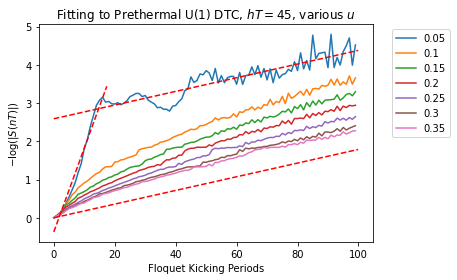

In [32]:
plt.plot(-np.log(abs(vals3[5:12].transpose())),label=cnst2[5:12])
x=np.arange(0,100,.1)
plt.plot(x,x*p2[0],'r--')
plt.plot(x,x*p2[0]+p2[1],'r--')
plt.plot(x1,f1,'r--')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.title(r"Fitting to Prethermal U(1) DTC, $hT=45$, various $u$")
plt.show()

In [33]:
#print(nmr.PulseProgram.dtc_ken16_compiled_8(170,8,n_max=100,phi=23))

In [34]:
vals4=nmr.Experiment(413).load_tpc3d()
kicks=list(range(vals1.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

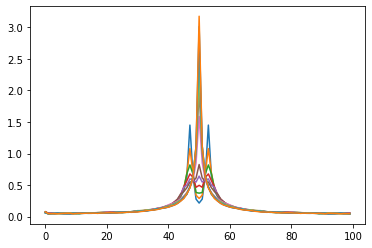

In [35]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals4])
plt.plot(fourier.transpose())
plt.show()

In [36]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


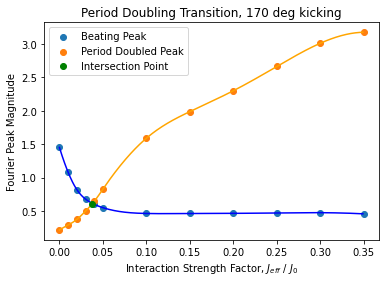

In [37]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170_quarter=xs[idx]

plt.legend()
plt.show()

In [38]:
#print(nmr.PulseProgram.dtc_ken16_compiled_8(170,8,n_max=100,phi=180))

In [39]:
vals5=nmr.Experiment(414).load_tpc3d()
kicks=list(range(vals1.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

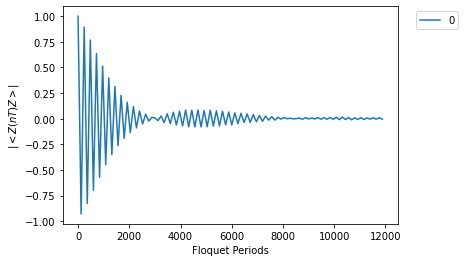

In [40]:
plt.plot(np.arange(0,100,1)*120,vals5[0].transpose(),label=cnst2[0])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.show()

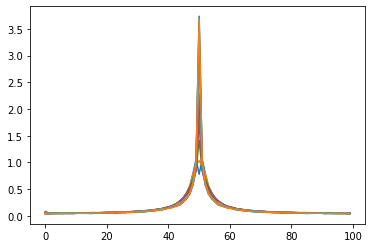

In [41]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals5])
plt.plot(fourier.transpose())
plt.show()

In [42]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)


In [43]:
freq[47]

0.47000000000000003

In [44]:
.5-(180-170)/360

0.4722222222222222

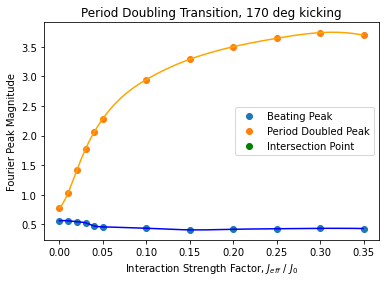

In [45]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170_ultra=xs[idx]

plt.legend()
plt.show()

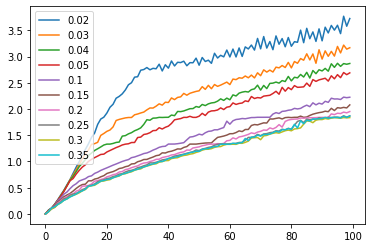

In [46]:
plt.plot(-np.log(abs(vals5[2:12].transpose())),label=cnst2[2:12])
plt.legend()
plt.show()

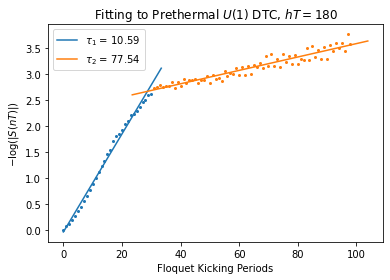

In [47]:
x=kicks
y=-np.log(abs(vals5[2]))
cut = 31

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=180$")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.show()

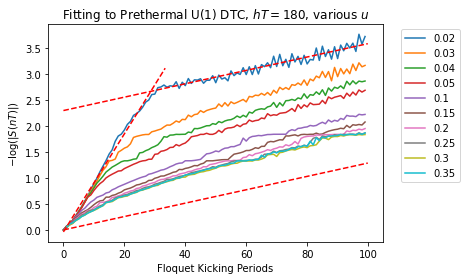

In [48]:
plt.plot(-np.log(abs(vals5[2:12].transpose())),label=cnst2[2:12])
x=np.arange(0,100,.1)
plt.plot(x,x*p2[0],'r--')
plt.plot(x,x*p2[0]+p2[1],'r--')
plt.plot(x1,f1,'r--')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.title(r"Fitting to Prethermal U(1) DTC, $hT=180$, various $u$")
plt.show()

In [49]:
#print(nmr.PulseProgram.dtc_ken16_compiled_8(170,8,n_max=100,phi=135))

In [50]:
vals6=nmr.Experiment(419).load_tpc3d()
kicks=list(range(vals1.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=[0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35]

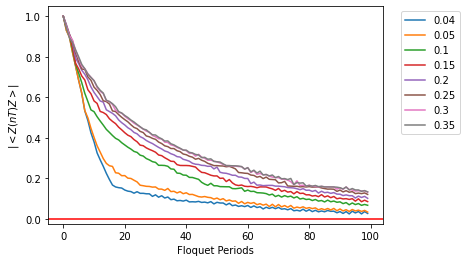

In [51]:
plt.plot(abs(vals6[4:12].transpose()),label=cnst2[4:12])
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.show()

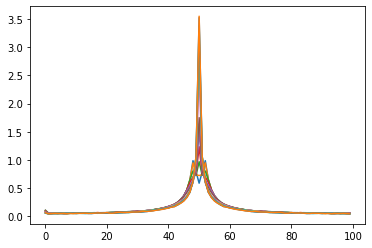

In [52]:
fourier = np.array([abs(sp.fft.fft(val, norm="ortho")) for val in vals6])
plt.plot(fourier.transpose())
plt.show()

In [53]:
off_res = np.array([ft[47] for ft in fourier])
res = np.array([ft[50] for ft in fourier])

cs_off = CubicSpline(cnst2, off_res)
cs_on = CubicSpline(cnst2, res)
xs = np.arange(0, 0.35, .001)

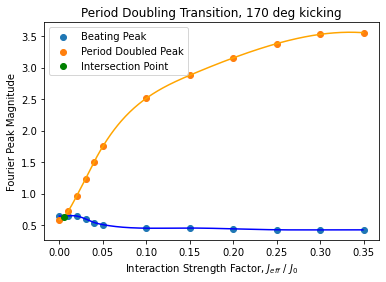

In [54]:
plt.scatter(cnst2, off_res, label="Beating Peak")
plt.plot(xs, cs_off(xs), "b")

plt.scatter(cnst2, res, label="Period Doubled Peak")
plt.plot(xs, cs_on(xs), "orange")


plt.xlabel(r'Interaction Strength Factor, $J_{eff}$ / $J_0$')
plt.ylabel("Fourier Peak Magnitude")
plt.title("Period Doubling Transition, 170 deg kicking")

idx = np.argwhere(np.diff(np.sign(cs_off(xs) - cs_on(xs)))).flatten()
plt.plot(xs[idx], cs_on(xs)[idx], 'go', label='Intersection Point')
cross170_midultra=xs[idx]

plt.legend()
plt.show()

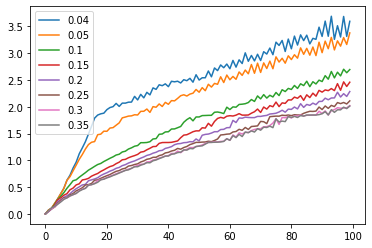

In [55]:
plt.plot(-np.log(abs(vals6[4:12].transpose())),label=cnst2[4:12])
plt.legend()
plt.show()

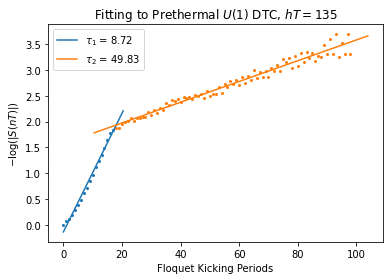

In [56]:
x=kicks
y=-np.log(abs(vals6[4]))
cut = 18

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=135$")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.show()

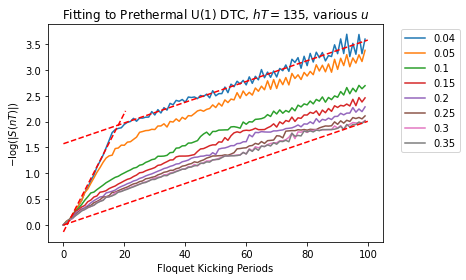

In [57]:
plt.plot(-np.log(abs(vals6[4:12].transpose())),label=cnst2[4:12])
x=np.arange(0,100,.1)
plt.plot(x,x*p2[0],'r--')
plt.plot(x,x*p2[0]+p2[1],'r--')
plt.plot(x1,f1,'r--')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.title(r"Fitting to Prethermal U(1) DTC, $hT=135$, various $u$")
plt.show()

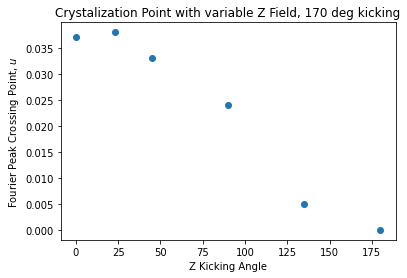

In [58]:
z_field = [0, 23, 45, 90, 135, 180]
crossings = [cross170_min[0], cross170_quarter[0], cross170_mid[0], cross170_max[0], cross170_midultra[0], 0.00]
plt.scatter(z_field,crossings)
plt.xlabel("Z Kicking Angle")
plt.ylabel(r"Fourier Peak Crossing Point, $u$")
plt.title("Crystalization Point with variable Z Field, 170 deg kicking")
plt.show()

Internal Hamiltonian with Max Z test

In [59]:
print(nmr.PulseProgram.zx_kicking(170,180,9,100))

ph0 = (360) 90 118 146 174 202 230 258 286 314 342 10 38 66 94 122 150 178 206 234 262 290 318 346 14 42 70 98 126 154 182 210 238 266 294 322 350 18 46 74 102 130 158 186 214 242 270 298 326 354 22 50 78 106 134 162 190 218 246 274 302 330 358 26 54 82 110 138 166 194 222 250 278 306 334 2 30 58 86 114 142 170 198 226 254 282 310 338 6 34 62 90 118 146 174 202 230 258 286 314 342 10 38 66 94 122 150 178 206 234 262 290 318 346 14 42 70 98 126 154 182 210 238 266 294 322 350 18 46 74 102 130 158 186 214 242 270 298 326 354 22 50 78 106 134 162 190 218 246 274 302
ph1 = (360) 109 137 165 193 221 249 277 305 333 1 29 57 85 113 141 169 197 225 253 281 309 337 5 33 61 89 117 145 173 201 229 257 285 313 341 9 37 65 93 121 149 177 205 233 261 289 317 345 13 41 69 97 125 153 181 209 237 265 293 321 349 17 45 73 101 129 157 185 213 241 269 297 325 353 21 49 77 105 133 161 189 217 245 273 301 329 357 25 53 81 109 137 165 193 221 249 277 305 333 1 29 57 85 113 141 169 197 225 253 281 309 337 5 3

In [60]:
vals = nmr.Experiment(433).load_tpc3d()

kicks=list(range(vals1.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=np.array([2.5, 5, 7.5, 10, 15, 30, 45, 60])/120

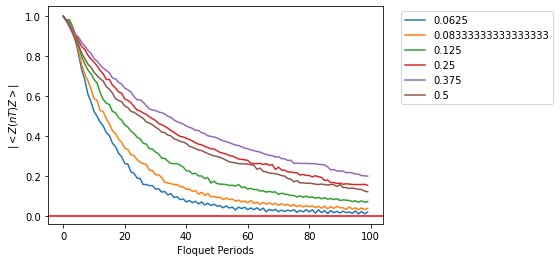

In [61]:
plt.plot(abs(vals[2:8].transpose()),label=cnst2[2:8])
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.show()

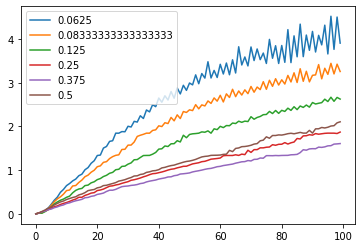

In [62]:
plt.plot(-np.log(abs(vals[2:8].transpose())),label=cnst2[2:8])
plt.legend()
plt.show()

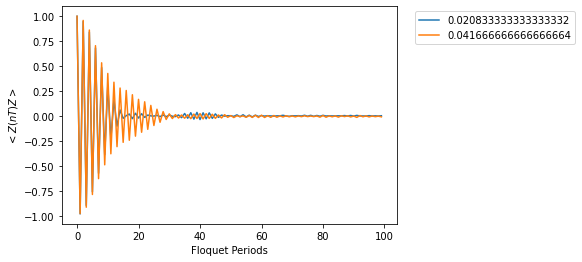

In [63]:
plt.plot(vals[0:2].transpose(),label=cnst2[0:2])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$<Z(nT)Z>$")
plt.show()

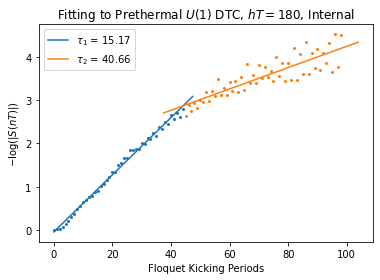

In [64]:
x=kicks
y=-np.log(abs(vals[2]))
cut = 45

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=180$, Internal")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.show()

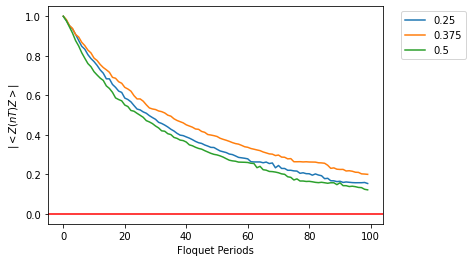

In [65]:
plt.plot(abs(vals[5:8].transpose()),label=cnst2[5:8])
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.show()

In [66]:
def func(x, a, b, c, d):
    return d*np.exp(- (x / a) ** b ) + c

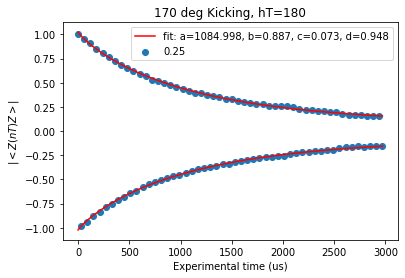

[1.69107545e+01 1.41653483e-02 7.41466023e-03 1.08913030e-02]


In [67]:
x=np.array(kicks)*30
idx=5
decay=abs(vals[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*30, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=180")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

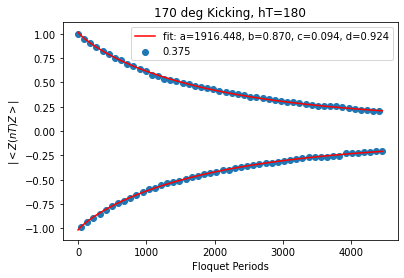

[3.72133358e+01 1.37417806e-02 9.07657473e-03 1.19852980e-02]


In [68]:
x=np.array(kicks)*45
idx=6
decay=abs(vals[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*45, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=180")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

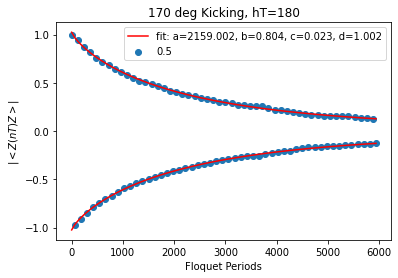

[4.05913102e+01 1.32047230e-02 8.77170568e-03 1.24934532e-02]


In [69]:
x=np.array(kicks)*60
idx=7
decay=abs(vals[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*60, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=180")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

In [70]:
print(nmr.PulseProgram.zx_kicking(170,0,8,100))

ph0 = (360) 270 116 322 168 14 220 66 272 118 324 170 16 222 68 274 120 326 172 18 224 70 276 122 328 174 20 226 72 278 124 330 176 22 228 74 280 126 332 178 24 230 76 282 128 334 180 26 232 78 284 130 336 182 28 234 80 286 132 338 184 30 236 82 288 134 340 186 32 238 84 290 136 342 188 34 240 86 292 138 344 190 36 242 88 294 140 346 192 38 244 90 296 142 348 194 40 246 92 298 144 350 196 42 248 94 300 146 352 198 44 250 96 302 148 354 200 46 252 98 304 150 356 202 48 254 100 306 152 358 204 50 256 102 308 154 0 206 52 258 104 310 156 2 208 54 260 106 312 158 4
ph1 = (360) 288 134 340 186 32 238 84 290 136 342 188 34 240 86 292 138 344 190 36 242 88 294 140 346 192 38 244 90 296 142 348 194 40 246 92 298 144 350 196 42 248 94 300 146 352 198 44 250 96 302 148 354 200 46 252 98 304 150 356 202 48 254 100 306 152 358 204 50 256 102 308 154 0 206 52 258 104 310 156 2 208 54 260 106 312 158 4 210 56 262 108 314 160 6 212 58 264 110 316 162 8 214 60 266 112 318 164 10 216 62 268 114 320 166

In [71]:
vals0 = nmr.Experiment(437).load_tpc3d()

kicks=list(range(vals0.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=np.array([2.5, 5, 7.5, 10, 15, 30, 45, 60])/120

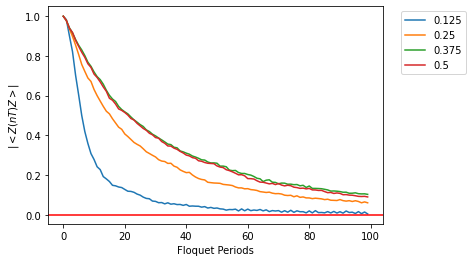

In [72]:
plt.plot(abs(vals0[4:8].transpose()),label=cnst2[4:8])
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.show()

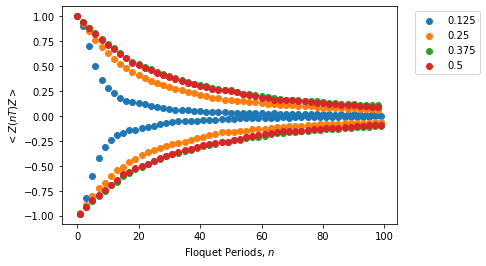

In [73]:
for idx in range(4,8):
    plt.scatter(kicks, vals0[idx], label=cnst2[idx])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel(r"Floquet Periods, $n$")
plt.ylabel(r"$<Z(nT)Z>$")
plt.show()

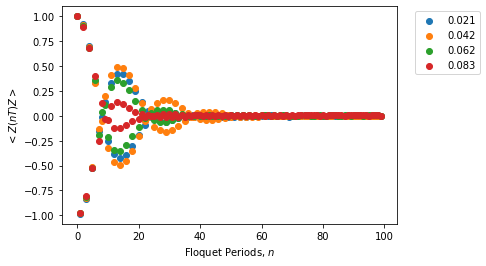

In [74]:
for idx in range(4):
    plt.scatter(kicks, vals0[idx], label="{:.3f}".format(cnst2[idx]))
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel(r"Floquet Periods, $n$")
plt.ylabel(r"$<Z(nT)Z>$")
plt.show()

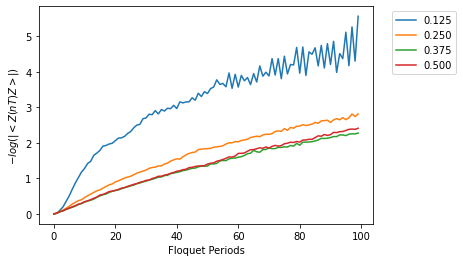

In [75]:
plt.plot(-np.log(abs(vals0[4:8].transpose())),label=["{:.3f}".format(val) for val in cnst2[4:8]])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$-log(|<Z(nT)Z>|)$")
plt.show()

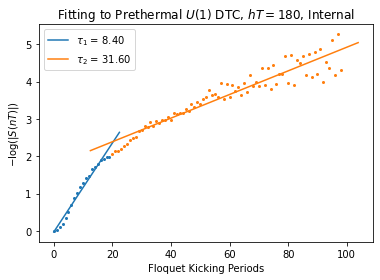

In [76]:
x=kicks
y=-np.log(abs(vals0[4]))
cut = 20

plt.scatter(x[0:cut],y[0:cut],s=4)
p1 = np.polyfit(x[0:cut],y[0:cut],1)
x1 = np.arange(0,x[cut]+2.5,.1)
f1 = p1[0]*x1+p1[1]
plt.plot(x1,f1,label=r"$\tau_1$ = {:.2f}".format(1/p1[0]))

plt.scatter(x[cut:-1],y[cut:-1],s=4)
p2 = np.polyfit(x[cut:-1],y[cut:-1],1)
x2 = np.arange(x[cut]-7.5,x[-1]+5,.1)
f2 = p2[0]*x2+p2[1]
plt.plot(x2,f2,label=r"$\tau_2$ = {:.2f}".format(1/p2[0]))

plt.legend()
plt.title(r"Fitting to Prethermal $U(1)$ DTC, $hT=180$, Internal")
plt.xlabel("Floquet Kicking Periods")
plt.ylabel(r"$-\log(|S(nT)|)$")
plt.show()

C:\Users\awsta\AppData\Local\Temp\ipykernel_15192\2633144208.py:2: RuntimeWarning: invalid value encountered in power
  return d*np.exp(- (x / a) ** b ) + c


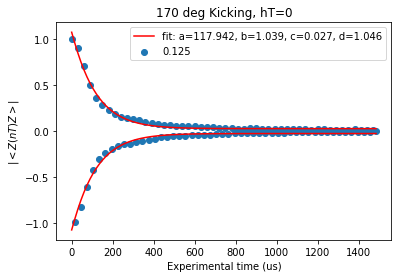

[3.24837033e+00 3.65119092e-02 2.79993569e-03 1.95291333e-02]


In [77]:
x=np.array(kicks)*15
idx=4
decay=abs(vals0[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*30, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals0[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=0")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

In [78]:
popt[2]/perr[2]

9.47407434140473

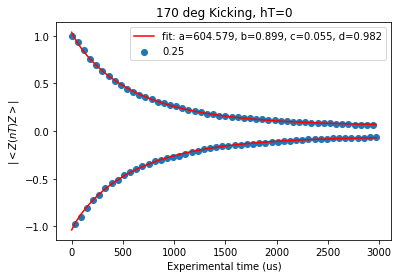

[5.63734643e+00 1.16152284e-02 2.70706778e-03 7.33498459e-03]


In [79]:
x=np.array(kicks)*30
idx=5
decay=abs(vals0[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*30, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals0[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=0")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)


In [80]:
popt[2]/perr[2]

20.312200328785448

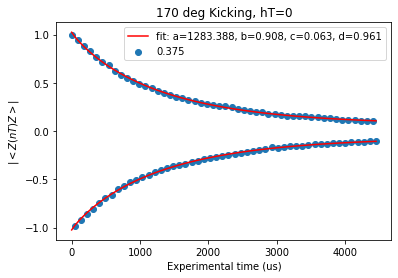

[1.19144807e+01 1.12095615e-02 4.04390664e-03 7.39636003e-03]


In [81]:
x=np.array(kicks)*45
idx=6
decay=abs(vals0[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*45, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals0[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=0")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

In [82]:
popt[2]/perr[2]

15.464156706521988

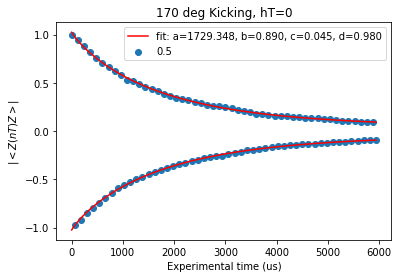

[1.68884346e+01 1.11626918e-02 4.35573335e-03 7.77783153e-03]


In [83]:
x=np.array(kicks)*60
idx=7
decay=abs(vals0[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*60, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals0[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=0")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

In [84]:
popt[2]/perr[2]

10.241273100903802

In [85]:
vals1 = nmr.Experiment(442).load_tpc3d()

kicks=list(range(vals1.shape[1]))
freq = [i*(1/(len(kicks))) for i in range(len(kicks))]
eps=(180-170)/360

cnst2=np.array([10, 11, 12, 13, 14, 15, 60, 90, 120])/120

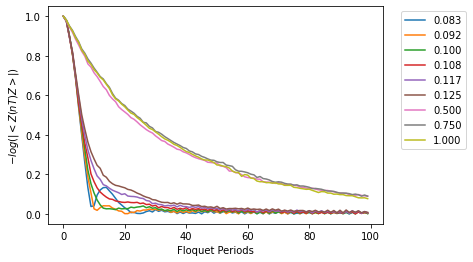

In [86]:
plt.plot(abs(vals1.transpose()),label=["{:.3f}".format(val) for val in cnst2])
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("Floquet Periods")
plt.ylabel(r"$-log(|<Z(nT)Z>|)$")
plt.show()

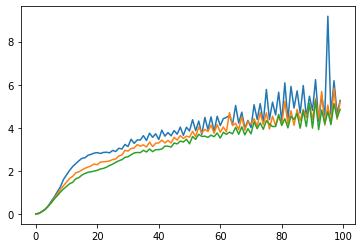

In [87]:
plt.plot(-np.log(abs(vals1[3:6].transpose())))

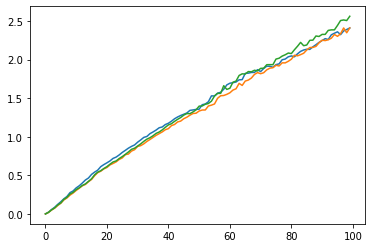

In [88]:
plt.plot(-np.log(abs(vals1[6:9].transpose())))
plt.show()

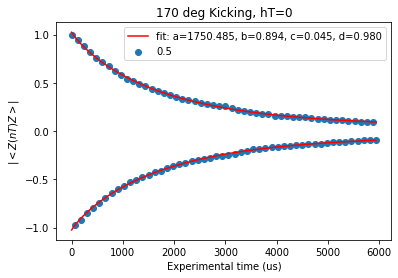

[1.70040421e+01 1.11050252e-02 4.37500302e-03 7.73805410e-03]


In [89]:
x=np.array(kicks)*60
idx=6
decay=abs(vals1[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*60, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals1[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=0")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

In [90]:
popt[2]/perr[2]

10.228760181163603

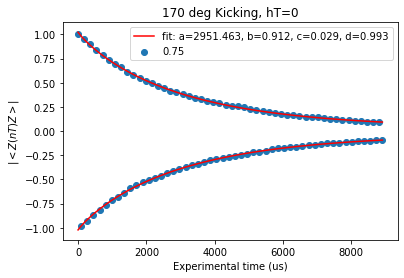

[2.72180093e+01 1.00463586e-02 4.53013473e-03 7.27821097e-03]


In [91]:
x=np.array(kicks)*90
idx=7
decay=abs(vals1[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*60, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals1[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=0")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

In [92]:
popt[2]/perr[2]

6.340973616725538

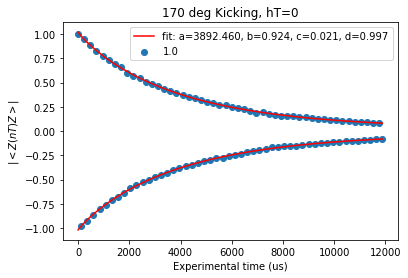

[3.28485240e+01 9.61752889e-03 4.16412878e-03 6.80097848e-03]


In [93]:
x=np.array(kicks)*120
idx=8
decay=abs(vals1[idx])

popt, pcov = curve_fit(func, x, decay, p0=[15*60, 4/5, 0, 1])
perr = np.sqrt(np.diag(pcov))


plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(x, -func(x, *popt), 'r-')
plt.scatter(x, vals1[idx],label=cnst2[idx])
plt.title("170 deg Kicking, hT=0")
plt.xlabel("Experimental time (us)")
plt.ylabel(r"$|<Z(nT)Z>|$")
plt.legend()
plt.show()


print(perr)

In [94]:
popt[2]/perr[2]

5.056434372114216